In [ ]:
%load_ext autoreload

%autoreload 2
#plt.tight_layout()
#tikzplotlib.save("linearreg_tikz.tex", axis_width = '13cm',axis_height = '6cm' )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

import xgboost as xgb
from sklearn import metrics, model_selection

import seaborn as sns
#import tikzplotlib

In [2]:
# import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
# params = {'text.usetex' : True,
#           'font.size' : 11,
#           'axes.labelsize': 10,
#           'axes.titlesize': 10,
#           'xtick.labelsize': 8,
#           'ytick.labelsize': 8,
#           'font.family': 'serif',
#           #'figure.figsize' : [5.8, 3.0],
#           'figure.figsize' : [5.6, 3],
#           'text.latex.unicode': True,
#           }
# plt.rcParams.update(params) 
#matplotlib.rcParams['pgf.rcfonts'] = False

In [3]:
#load the data set
df_results = pd.read_pickle("results_rnn1_rnn2_xgb_reg1_reg2_nn_xgbh.pkl")

In [4]:
df_combination_results = pd.read_pickle('df_combination_results.pkl')

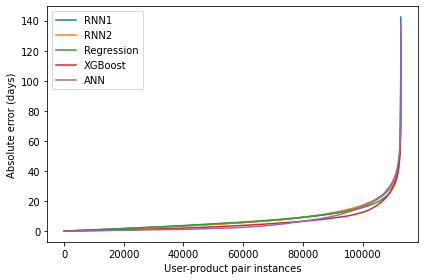

In [5]:
###################### Figure absolute error ALL  ---- 1 ######################

#plotting the absolute error
x = len(df_results)
#x = 40000
abs_error = np.abs(df_results['t_0'] - df_results['rnn_1'])
plt.plot(np.sort(abs_error)[:x], label = "RNN1")

abs_error_rrn = np.abs(df_results['t_0'] - df_results['rnn_2']).values
plt.plot(np.sort(abs_error_rrn)[:x], label = "RNN2")

abs_error = np.abs(df_results['t_0'] - df_results['reg_1'])
plt.plot(np.sort(abs_error)[:x], label = "Regression")

abs_error = np.abs(df_results['t_0'] - df_results['xgb_h'])
plt.plot(np.sort(abs_error)[:x], label = "XGBoost")

abs_error = np.abs(df_results['t_0'] - df_results['nn'])
plt.plot(np.sort(abs_error)[:x], label = "ANN")

plt.legend()

plt.xlabel("User-product pair instances")
plt.ylabel("Absolute error (days)")
#plt.title('Absolute error per technique')

plt.tight_layout()
#plt.savefig('absolute_error_all.pgf')


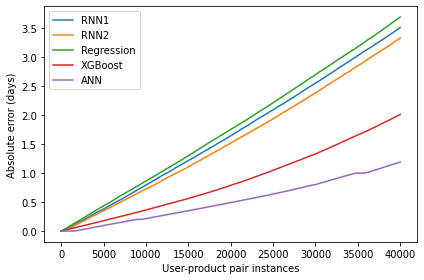

In [6]:
###################### Figure absolute error first 40 000  ---- 2 ######################



#plotting the absolute error
#x = len(df_results)
x = 40000
abs_error = np.abs(df_results['t_0'] - df_results['rnn_1'])
plt.plot(np.sort(abs_error)[:x], label = "RNN1")

abs_error_rrn = np.abs(df_results['t_0'] - df_results['rnn_2']).values
plt.plot(np.sort(abs_error_rrn)[:x], label = "RNN2")

abs_error = np.abs(df_results['t_0'] - df_results['reg_1'])
plt.plot(np.sort(abs_error)[:x], label = "Regression")

abs_error = np.abs(df_results['t_0'] - df_results['xgb_h'])
plt.plot(np.sort(abs_error)[:x], label = "XGBoost")

abs_error = np.abs(df_results['t_0'] - df_results['nn'])
plt.plot(np.sort(abs_error)[:x], label = "ANN")

plt.legend()

plt.xlabel("User-product pair instances")
plt.ylabel("Absolute error (days)")
#plt.title('Absolute error per technique')

plt.tight_layout()
#plt.savefig('absolute_error_40000.pgf')

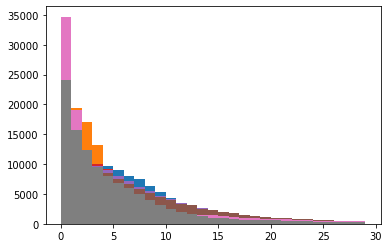

In [7]:
bins = 30
aaa_line = plt.hist(np.abs(df_results['t_0'] - df_results['avg_days']), bins = np.arange(bins))
xg_line = plt.hist(np.abs(df_results['t_0'] - df_results['xgb']), bins = np.arange(bins))
rnn2_line = plt.hist(np.abs(df_results['t_0'] - df_results['rnn_2']), bins = np.arange(bins))
rnn1_line = plt.hist(np.abs(df_results['t_0'] - df_results['rnn_1']), bins = np.arange(bins))
reg_line = plt.hist(np.abs(df_results['t_0'] - df_results['reg_1']), bins = np.arange(bins))
reg2_line = plt.hist(np.abs(df_results['t_0'] - df_results['reg_2']), bins = np.arange(bins))
nn_line = plt.hist(np.abs(df_results['t_0'] - df_results['nn']), bins = np.arange(bins))
xgbh_line = plt.hist(np.abs(df_results['t_0'] - df_results['xgb_h']), bins = np.arange(bins))


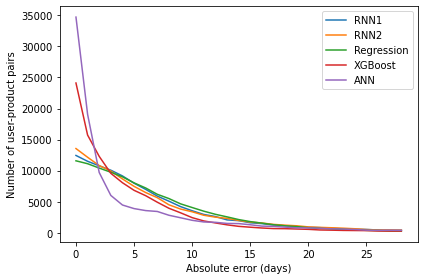

In [8]:
#plotting the absolute error per technique

#plt.plot(aaa_line[1][:-1] ,aaa_line[0], label = "AAA")

plt.plot(rnn1_line[1][:-1] ,rnn1_line[0], label = "RNN1")
plt.plot(rnn2_line[1][:-1] ,rnn2_line[0], label = "RNN2")
plt.plot(reg_line[1][:-1] ,reg_line[0], label = "Regression")
plt.plot(xgbh_line[1][:-1] ,xgbh_line[0], label = "XGBoost")
plt.plot(nn_line[1][:-1] ,nn_line[0], label = "ANN")


plt.ylabel("Number of user-product pairs")
plt.xlabel("Absolute error (days)")
#plt.title("Number of user-product pairs predicted per absolute error in days")
plt.legend()
plt.tight_layout()

#plt.savefig('error_prediction_with_nn.pgf')

In [9]:
# plt.plot(xg_line[1][:-1] ,xg_line[0], label = "XGBoost")
# plt.plot(xgbh_line[1][:-1] ,xgbh_line[0], label = "XGBh")
# plt.plot(nn_line[1][:-1] ,nn_line[0], label = "NN")

# plt.ylabel("Number of user-product pairs")
# plt.xlabel("Absolute error (days)")
# plt.legend()

In [10]:
# plt.plot(rnn1_line[1][:-1] ,rnn1_line[0], label = "RNN1")
# plt.plot(rnn2_line[1][:-1] ,rnn2_line[0], label = "RNN2")
# plt.ylabel("Number of products")
# plt.xlabel("Absolute error (days)")
# plt.title("Absolute error per technique")
# plt.legend()

In [11]:
# plt.plot(reg_line[1][:-1] ,reg_line[0], label = "Regression")
# plt.plot(reg2_line[1][:-1] ,reg2_line[0], label = "Regression2")
# plt.ylabel("Number of products")
# plt.xlabel("Absolute error (days)")
# plt.title("Absolute error per technique")
# plt.legend()

In [12]:
#Zooming in on the absolute error less than 7 days

#rnn
rnn_bar = (rnn1_line[0][:7]/len(df_results['t_0']))*100
rnn2_bar = (rnn2_line[0][:7]/len(df_results['t_0']))*100

#reg2
reg_bar = (reg_line[0][:7]/len(df_results['t_0']))*100

#xg_bar
xg_bar = (xg_line[0][:7]/len(df_results['t_0']))*100

#nn_bar
nn_bar = (nn_line[0][:7]/len(df_results['t_0']))*100

x = [1,2,3,4,5,6,7]

dict = {'RNN1':rnn_bar.tolist(),
        'RNN2':rnn2_bar.tolist(),
        'Regression':reg_bar.tolist(),        
        'XGBoost':xg_bar.tolist(),
        'ANN':nn_bar.tolist(),
       }

df = pd.DataFrame(dict) 


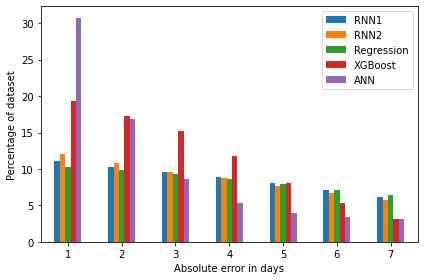

In [13]:
pd.concat(
    [df['RNN1'], df['RNN2'], 
     df['Regression'],df['XGBoost'],df['ANN'] ],
    axis=1).plot.bar()

#plt.title('Percentage of dataset predicted')
#plt.ylim(2.1,2.9)
plt.xticks([0,1,2,3,4,5,6],[1,2,3,4,5,6,7], rotation = 0)
plt.xlabel("Absolute error in days")
plt.ylabel("Percentage of dataset")

plt.tight_layout()
#plt.savefig('bar_plot_including_nn.pgf')



#

In [14]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [15]:
df_results_with_index = df_results.reset_index()
df_results_with_index = df_results_with_index.drop(['index',
                                                    'product_seq',
                                                    'days_since_seq'],
                                                    axis = 1)

In [16]:
df_results_with_index.head(10)

,user_id,product_id,avg_days,t_0,rnn_2,rnn_1,xgb,reg_1,reg_2,nn,xgb_h
0,17.0,7350.0,8.300000,4.0,6.862155,7.088790,4.910774,5.758884,6.175457,3.787163,4.738051
1,17.0,17762.0,10.863636,5.0,6.240351,16.425231,7.857338,7.500827,7.140900,4.941260,6.052570
2,17.0,18534.0,9.370370,5.0,7.937564,7.874184,7.061441,6.818869,5.823193,4.303373,10.101567
3,21.0,23729.0,11.444444,0.0,13.624990,9.780107,3.474062,7.987575,6.592558,1.142237,1.693560
4,27.0,1194.0,14.850000,52.0,4.650098,6.015744,10.517996,19.713791,21.152506,1.571941,6.015417
5,27.0,2966.0,12.481481,5.0,11.262507,10.801764,9.219683,17.290309,20.232995,2.057330,12.111904
6,27.0,14233.0,18.882353,30.0,33.972431,26.603354,10.409048,26.103656,27.806612,3.035617,10.149772
7,36.0,11079.0,18.000000,3.0,-3.140467,15.528105,8.605721,29.772194,41.479892,0.000000,19.620356
8,50.0,5612.0,10.580645,9.0,9.260267,9.623361,8.476599,15.436927,17.820553,6.378509,9.130041
9,50.0,6182.0,6.760000,7.0,5.471245,5.922330,7.433251,6.152880,5.810366,5.347875,6.378352


In [17]:
df_results_with_index['absolute_xgb_results'] = (np.abs(df_results['t_0'] - df_results['xgb'])).values
df_results_with_index['absolute_regression_results'] = np.abs(df_results['t_0'] - df_results['reg_1']).values
df_results_with_index['absolute_RNN1_results'] = np.abs(df_results['t_0'] - df_results['rnn_1']).values
df_results_with_index['absolute_AAA_results'] = np.abs(df_results['t_0'] - df_results['avg_days']).values
df_results_with_index['absolute_RNN2_results'] = np.abs(df_results['t_0'] - df_results['rnn_2']).values
df_results_with_index['absolute_reg2_results'] = np.abs(df_results['t_0'] - df_results['reg_2']).values
df_results_with_index['absolute_reg2_results'] = np.abs(df_results['t_0'] - df_results['reg_2']).values
df_results_with_index['absolute_nn_results'] = np.abs(df_results['t_0'] - df_results['nn']).values
df_results_with_index['absolute_xgbh_results'] = (np.abs(df_results['t_0'] - df_results['xgb_h'])).values

xgboost_best = df_results_with_index[df_results_with_index['absolute_xgb_results']<=1]
regression_best = df_results_with_index[df_results_with_index['absolute_regression_results']<=1]
rnn_best = df_results_with_index[df_results_with_index['absolute_RNN1_results']<=1]
aaa_best = df_results_with_index[df_results_with_index['absolute_AAA_results']<=1]
rnn2_best = df_results_with_index[df_results_with_index['absolute_RNN2_results']<=1]
regression2_best = df_results_with_index[df_results_with_index['absolute_reg2_results']<=1]
nn_best = df_results_with_index[df_results_with_index['absolute_nn_results']<=1]
xgboosth_best = df_results_with_index[df_results_with_index['absolute_xgbh_results']<=1]

xgboost_best = xgboost_best.reset_index()
regression_best = regression_best.reset_index()
rnn_best = rnn_best.reset_index()
aaa_best = aaa_best.reset_index()
rnn2_best = rnn2_best.reset_index()
regression2_best = regression2_best.reset_index()
nn_best = nn_best.reset_index()
xgboosth_best = xgboosth_best.reset_index()

#keep only the index
xgb_index = xgboost_best['index']
reg_index = regression_best['index']
rnn_index = rnn_best['index']
aaa_index = aaa_best['index']
rnn2_index = rnn2_best['index']
reg2_index = regression2_best['index']
nn_index = nn_best['index']
xgbh_index = xgboosth_best['index']

In [18]:
df_results_with_index

,user_id,product_id,avg_days,t_0,rnn_2,rnn_1,xgb,reg_1,reg_2,nn,xgb_h,absolute_xgb_results,absolute_regression_results,absolute_RNN1_results,absolute_AAA_results,absolute_RNN2_results,absolute_reg2_results,absolute_nn_results,absolute_xgbh_results
0,17.0,7350.0,8.300000,4.0,6.862155,7.088790,4.910774,5.758884,6.175457,3.787163,4.738051,0.910774,1.758884,3.088790,4.300000,2.862155,2.175457,0.212837,0.738051
1,17.0,17762.0,10.863636,5.0,6.240351,16.425231,7.857338,7.500827,7.140900,4.941260,6.052570,2.857338,2.500827,11.425231,5.863636,1.240351,2.140900,0.058740,1.052570
2,17.0,18534.0,9.370370,5.0,7.937564,7.874184,7.061441,6.818869,5.823193,4.303373,10.101567,2.061441,1.818869,2.874184,4.370370,2.937564,0.823193,0.696627,5.101567
3,21.0,23729.0,11.444444,0.0,13.624990,9.780107,3.474062,7.987575,6.592558,1.142237,1.693560,3.474062,7.987575,9.780107,11.444444,13.624990,6.592558,1.142237,1.693560
4,27.0,1194.0,14.850000,52.0,4.650098,6.015744,10.517996,19.713791,21.152506,1.571941,6.015417,41.482004,32.286209,45.984256,37.150000,47.349902,30.847494,50.428059,45.984583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112791,204967.0,14364.0,6.777778,7.0,9.363079,6.432941,7.320751,5.698675,4.842771,6.652145,6.241503,0.320751,1.301325,0.567059,0.222222,2.363079,2.157229,0.347855,0.758497
112792,204967.0,27845.0,5.750000,6.0,3.382243,5.670137,5.437366,5.261697,5.082384,5.623065,8.411008,0.562634,0.738303,0.329863,0.250000,2.617757,0.917616,0.376935,2.411008
112793,204976.0,30411.0,9.137931,33.0,12.191538,8.088606,12.193625,9.946403,16.877734,10.660387,11.674577,20.806375,23.053597,24.911394,23.862069,20.808462,16.122266,22.339613,21.325423
112794,204981.0,38444.0,8.892857,6.0,6.199759,7.166289,5.613256,9.216897,7.183335,3.913031,7.007847,0.386744,3.216897,1.166289,2.892857,0.199759,1.183335,2.086969,1.007847


In [22]:
nn_index

0             0
1             1
2             2
3            11
4            12
          ...  
35845    112786
35846    112787
35847    112790
35848    112791
35849    112792
Name: index, Length: 35850, dtype: int64

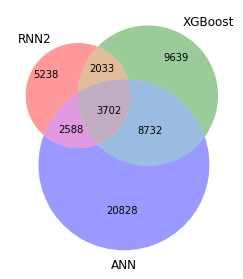

In [23]:
venn3([set(rnn2_index), set(xgbh_index), set(nn_index)], ('RNN2', 'XGBoost', 'ANN'))
#plt.show()
plt.tight_layout()
#plt.savefig('Venn_rnn_xgb_nn.pgf')

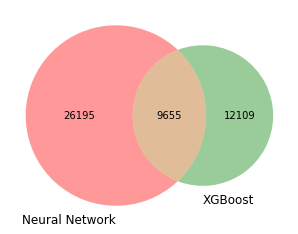

In [24]:
venn2([set(nn_index), set(xgb_index)], ('Neural Network', 'XGBoost'))
plt.show()

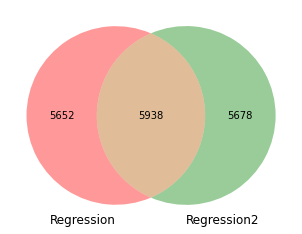

In [25]:
venn2([set(reg_index), set(reg2_index)], ('Regression', 'Regression2'))
plt.show()

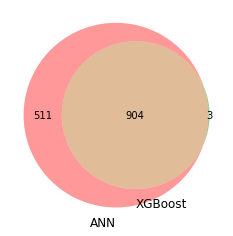

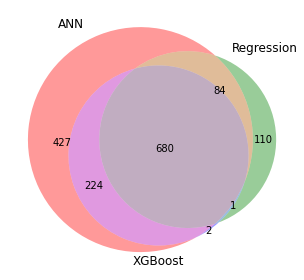

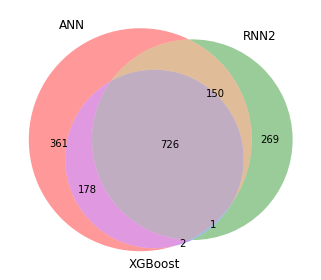

In [26]:
xgboost_worst = df_results_with_index[df_results_with_index['absolute_xgbh_results']>40]
regression_worst  = df_results_with_index[df_results_with_index['absolute_regression_results']>40]
rnn_worst = df_results_with_index[df_results_with_index['absolute_RNN2_results']>40]
nn_worst = df_results_with_index[df_results_with_index['absolute_nn_results']>40]

xgboost_worst = xgboost_worst.reset_index()
regression_worst = regression_worst.reset_index()
rnn_worst = rnn_worst.reset_index()
nn_worst = nn_worst.reset_index()

#keep only the index
xgb_index = xgboost_worst['index']
reg_index = regression_worst['index']
rnn_index = rnn_worst['index']
nn_index = nn_worst['index']

venn2([set(nn_index),  set(xgb_index)], ('ANN', 'XGBoost'))
plt.show()


venn3([set(nn_index), set(reg_index), set(xgb_index)], ('ANN', 'Regression' ,'XGBoost'))
plt.tight_layout()
#plt.savefig('less_than_40_days.pgf')

plt.figure()
venn3([set(nn_index), set(rnn_index), set(xgb_index)], ('ANN', 'RNN2' ,'XGBoost'))
plt.tight_layout()
#plt.savefig('less_than_40_days.pgf')

In [27]:
reg_index.shape

(875,)

In [28]:
rnn_index.shape

(1146,)

# Plotting for the combination methods

In [29]:
bins = 30

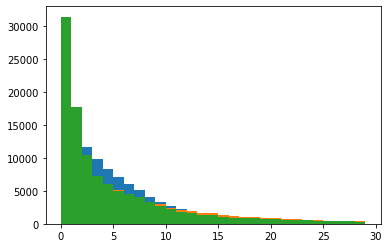

In [30]:
xgb_rnn_line = plt.hist(np.abs(df_combination_results['true_y'] - df_combination_results['xgb_rnn']), bins = np.arange(bins))
nn_rnn_line = plt.hist(np.abs(df_combination_results['true_y'] - df_combination_results['nn_rnn']), bins = np.arange(bins))
nn_xgboost_line =plt.hist(np.abs(df_combination_results['true_y'] - df_combination_results['nn_xgboost']), bins = np.arange(bins))

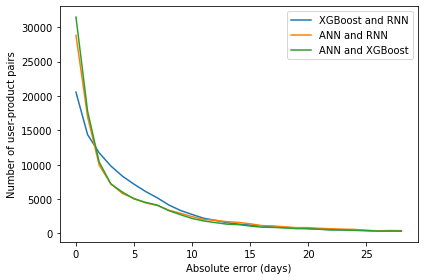

In [31]:
plt.plot(xgb_rnn_line[1][:-1] ,xgb_rnn_line[0], label = "XGBoost and RNN")
plt.plot(nn_rnn_line[1][:-1] ,nn_rnn_line[0], label = "ANN and RNN")
plt.plot(nn_xgboost_line[1][:-1] ,nn_xgboost_line[0], label = "ANN and XGBoost")

plt.ylabel("Number of user-product pairs")
plt.xlabel("Absolute error (days)")
#plt.title("Number of user-product pairs predicted per absolute error in days")
plt.legend()
plt.tight_layout()

plt.tight_layout()
#plt.savefig('error_prediction_with_combination_methods.pgf')

## Checking what happens when poor performers from selector are removed

Step 1: See if selector error > 20

Step 2: Remove entries from test dataset

Step 3: Plot test dataset results



In [ ]:
#Step 1: See if selector error > 20 

# load selector results for all the combinations



In [17]:
df_combination_results = df_combination_results.reset_index()



In [ ]:



df_results_with_index['absolute_xgb_results'] = (np.abs(df_results['t_0'] - df_results['xgb'])).values


xgboost_best = df_results_with_index[df_results_with_index['absolute_xgb_results']<=1]


xgboost_best = xgboost_best.reset_index()


#keep only the index
xgb_index = xgboost_best['index']


## Checking which products are predictable 

In [32]:
#keep only the product id that can be predicted with accuracy of smaller than one day
xgbh_product = xgboosth_best['product_id']
reg_product = regression_best['product_id']
rnn_product = rnn_best['product_id']
aaa_product = aaa_best['product_id']
rnn2_product = rnn2_best['product_id']
reg2_product = regression2_best['product_id']
nn_product = nn_best['product_id']

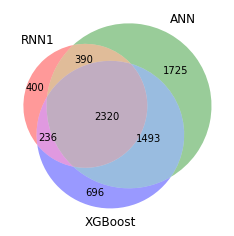

In [35]:
venn3([set(rnn_product), set(nn_product), set(xgbh_product)], ('RNN1', 'ANN', 'XGBoost'))
plt.show()

In [38]:
xgbh_product_vlaues = xgbh_product.values
xgbh_product_vlaues
arr_xg_values = np.unique(xgbh_product_vlaues, return_counts= True)
arr_xg_values[0]
arr_xg_values[1].max()
products, count = np.unique(xgbh_product_vlaues, return_counts= True)
products.astype(int)

array([ 7350.,  5612.,  6182., ..., 30450., 21267., 14364.])

In [53]:
nn_product_vlaues = nn_product.values
arr_nn_values = np.unique(nn_product_vlaues, return_counts= True)
nnproducts, nncount = np.unique(nn_product_vlaues, return_counts= True)
nnproducts.astype(int)

array([    1,     8,    10, ..., 49640, 49667, 49683])

In [66]:
rnn_product_vlaues = rnn2_product.values
arr_rnn2_values = np.unique(rnn_product_vlaues, return_counts= True)
rnnproducts, rnncount = np.unique(rnn_product_vlaues, return_counts= True)
rnnproducts.astype(int)

array([   25,    26,    28, ..., 49640, 49680, 49683])

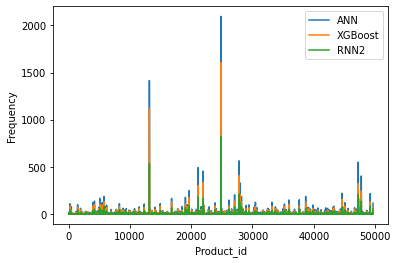

In [99]:
plt.plot(nnproducts,nncount,label = "ANN")
plt.plot(products,count,label = 'XGBoost')
plt.plot(rnnproducts,rnncount, label = 'RNN2')

#plt.title('Products with XGBoost prediction error less than one day per product')
plt.xlabel('Product_id')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### plotting the percentage of correct (number of times predicted correct vs the number of times the product was purchased)

In [69]:
df_test_final = pd.read_pickle('df_test_final_var.pkl')

In [70]:
products_mostly_purchased = df_test_final['product_id'].values
arr_mostly_purchased_values = np.unique(products_mostly_purchased, return_counts= True)
pmp, count_pmp = np.unique(products_mostly_purchased, return_counts= True)
pmp.astype(int)

array([    1,     3,     8, ..., 49680, 49683, 49686])

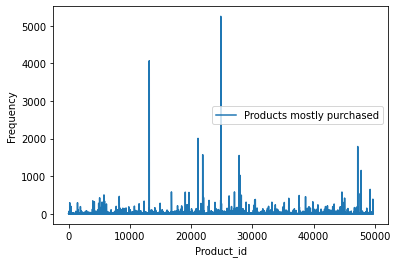

In [71]:
plt.plot(pmp,count_pmp, label = 'Products mostly purchased')

#plt.title('Products with XGBoost prediction error less than one day per product')
plt.xlabel('Product_id')
plt.ylabel('Frequency')
plt.legend()
plt.show()

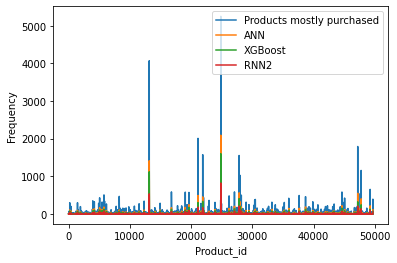

In [73]:
plt.plot(pmp,count_pmp, label = 'Products mostly purchased')
plt.plot(nnproducts,nncount,label = "ANN")
plt.plot(products,count,label = 'XGBoost')
plt.plot(rnnproducts,rnncount, label = 'RNN2')


#plt.title('Products with XGBoost prediction error less than one day per product')
plt.xlabel('Product_id')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
plt.plot(pmp,count_pmp, label = 'Products mostly purchased')
plt.plot(nnproducts,nncount,label = "ANN")


#plt.title('Products with XGBoost prediction error less than one day per product')
plt.xlabel('Product_id')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Products that are the most frequent in the test dataframe

In [111]:
df_test_final = pd.read_pickle('df_test_final_var.pkl')
table_products = pd.read_csv('../instacart/products.csv')

In [112]:
products_mostly_purchased = df_test_final['product_id'].values
arr_mostly_purchased_values = np.unique(products_mostly_purchased, return_counts= True)
pmp, count_pmp = np.unique(products_mostly_purchased, return_counts= True)
pmp.astype(int)

array([    1,     3,     8, ..., 49680, 49683, 49686])

In [113]:
pandas_df_higest_values = pd.DataFrame()
pandas_df_higest_values['product_id'] = pmp
pandas_df_higest_values['pmp_count'] = count_pmp
df_higest = pandas_df_higest_values.sort_values(by = 'pmp_count')
df_higest_with_products = df_higest.merge(table_products, how='inner', on='product_id')
df_higest_with_products = df_higest_with_products.drop(['aisle_id','department_id'], axis = 1)

In [114]:
df_higest_with_products

,product_id,pmp_count,product_name
0,25032.0,1,Beef Broth Condensed Soup
1,15587.0,1,Chardonnay Monterey
2,15579.0,1,Light in Sodium Black Bean Vegetable Enchilada...
3,15575.0,1,Organic Strawberry Coconut Milk Yogurt
4,15572.0,1,"Pineapple Chunks, Organic, in Their Own Organi..."
...,...,...,...
10390,21903.0,1577,Organic Baby Spinach
10391,47209.0,1794,Organic Hass Avocado
10392,21137.0,2010,Organic Strawberries
10393,13176.0,4071,Bag of Organic Bananas


### Product that are the most correctly predicted by the ANN

In [149]:
pandas_df_nn_highest = pd.DataFrame()
pandas_df_nn_highest['product_id'] = nnproducts
pandas_df_nn_highest['nn_count'] = nncount
df_higest_nn = pandas_df_nn_highest.sort_values(by = 'nn_count')
df_higest_with_products_nn = df_higest_nn.merge(table_products, how='inner', on='product_id')
df_higest_with_products_nn = df_higest_with_products_nn.drop(['aisle_id','department_id'], axis = 1)

In [150]:
df_higest_with_products_nn

,product_id,nn_count,product_name
0,17338.0,1,Vanilla Swiss Almond Ice Cream
1,21077.0,1,Cara Cara Navel Orange
2,21085.0,1,Cheese Melts Crackers
3,21095.0,1,Barbecue Chipotle Cheddar Tamales
4,21096.0,1,Sea Salt Kettle Cooked Potato Chips
...,...,...,...
5923,21137.0,492,Organic Strawberries
5924,47209.0,550,Organic Hass Avocado
5925,27845.0,564,Organic Whole Milk
5926,13176.0,1415,Bag of Organic Bananas


In [151]:
results_best_products_nn = df_higest_with_products_nn.merge(df_higest_with_products,how='inner', on='product_id')

In [153]:
results_best_products_nn['percentage_nn'] = (results_best_products_nn['nn_count']/results_best_products_nn['pmp_count'])*100
results_best_products_nn['product_testset'] = results_best_products_nn['pmp_count']

results_best_products_nn = results_best_products_nn.drop(['product_name_y','pmp_count'], axis = 1)

In [154]:
results_best_products_nn.head(5)

,product_id,nn_count,product_name_x,percentage_nn,product_testset
0,17338.0,1,Vanilla Swiss Almond Ice Cream,50.0,2
1,21077.0,1,Cara Cara Navel Orange,20.0,5
2,21085.0,1,Cheese Melts Crackers,100.0,1
3,21095.0,1,Barbecue Chipotle Cheddar Tamales,50.0,2
4,21096.0,1,Sea Salt Kettle Cooked Potato Chips,20.0,5


In [155]:
results_best_products_nn = results_best_products_nn.sort_values(by = 'percentage_nn')

In [162]:
results_best_products_nn[results_best_products_nn['percentage_nn'] == 100]

,product_id,nn_count,product_name_x,percentage_nn,product_testset
126,19885.0,1,Brambleberry Crisp Ice Cream,100.0,1
905,34893.0,1,Chai Rooibos Herbal Tea Bags,100.0,1
907,34881.0,1,Baba Ghannouj,100.0,1
908,31531.0,1,Pure Pink Grapefruit,100.0,1
3127,35682.0,2,Biscoff Cookie,100.0,2
...,...,...,...,...,...
2408,928.0,1,Chunky Classic Chicken Noodle Soup,100.0,1
3393,20704.0,2,Brut,100.0,2
1337,26730.0,1,Shrimp & Angel Hair Pasta,100.0,1
3384,21387.0,2,Non-Fat Vanilla Yogurt,100.0,2


In [160]:
results_best_products_nn[results_best_products_nn['percentage_nn'] <= 10]

,product_id,nn_count,product_name_x,percentage_nn,product_testset
1980,45633.0,1,Organic Beef Hot Dogs,3.703704,27
1623,26940.0,1,Organic Large Green Asparagus,4.347826,23
1225,32585.0,1,Sprouted Wheat Cinnamon Raisin Bagels,5.000000,20
1804,3798.0,1,Pink Lady Apples,5.555556,18
954,35042.0,1,Black Beans,6.666667,15
1224,32579.0,1,Organic Promise Autumn Wheat Cereal,6.666667,15
678,18176.0,1,Organic Strawberry Yogurt & Fruit Snack,7.142857,14
125,19875.0,1,Organic Yogurt Original Plain,7.142857,14
2331,4421.0,1,Organic Beef Uncured Hot Dogs,7.142857,14
2233,7485.0,1,Garlic Hummus,7.692308,13


In [168]:
cols = ['product_id','product_name_x','nn_count','product_testset','percentage_nn']
results_best_products_nn = results_best_products_nn[cols]

In [123]:
pandas_df_xgb_highest = pd.DataFrame()
pandas_df_xgb_highest['product_id'] = products
pandas_df_xgb_highest['xgb_count'] = count
df_higest_xgb = pandas_df_xgb_highest.sort_values(by = 'xgb_count').tail(10)
df_higest_with_products_xgb = df_higest_xgb.merge(table_products, how='inner', on='product_id')
df_higest_with_products_xgb = df_higest_with_products_xgb.drop(['aisle_id','department_id'], axis = 1)

In [124]:
df_higest_with_products_xgb

,product_id,xgb_count,product_name
0,44632.0,157,Sparkling Water Grapefruit
1,19660.0,177,Spring Water
2,27966.0,210,Organic Raspberries
3,47766.0,245,Organic Avocado
4,21137.0,303,Organic Strawberries
5,47209.0,324,Organic Hass Avocado
6,21903.0,336,Organic Baby Spinach
7,27845.0,409,Organic Whole Milk
8,13176.0,1122,Bag of Organic Bananas
9,24852.0,1603,Banana


In [ ]:
df_higest_with_products_xgb

### User product pairs that perform bad for the Neural Network model

In [163]:
nn_worst = df_results_with_index[df_results_with_index['absolute_nn_results']>40]

In [164]:
products_mostly_purchased = df_test_final['product_id'].values
arr_mostly_purchased_values = np.unique(products_mostly_purchased, return_counts= True)
pmp, count_pmp = np.unique(products_mostly_purchased, return_counts= True)
pmp.astype(int)

,user_id,product_id,avg_days,t_0,rnn_2,rnn_1,xgb,reg_1,reg_2,nn,xgb_h,absolute_xgb_results,absolute_regression_results,absolute_RNN1_results,absolute_AAA_results,absolute_RNN2_results,absolute_reg2_results,absolute_nn_results,absolute_xgbh_results
4,27.0,1194.0,14.850000,52.0,4.650098,6.015744,10.517996,19.713791,21.152506,1.571941,6.015417,41.482004,32.286209,45.984256,37.150000,47.349902,30.847494,50.428059,45.984583
36,146.0,11361.0,11.850000,60.0,8.222030,5.031127,12.157930,11.243651,13.965903,7.584430,21.247889,47.842070,48.756349,54.968873,48.150000,51.777970,46.034097,52.415570,38.752111
106,289.0,32429.0,15.058824,55.0,21.788107,26.648386,11.120867,11.337764,10.277899,9.597252,10.123616,43.879133,43.662236,28.351614,39.941176,33.211893,44.722101,45.402748,44.876384
162,334.0,37119.0,16.647059,41.0,9.120218,9.492045,3.521341,12.854589,13.152128,0.000000,6.899286,37.478659,28.145411,31.507955,24.352941,31.879782,27.847872,41.000000,34.100714
299,646.0,21137.0,12.782609,47.0,20.982136,12.750205,7.761999,12.354277,11.715139,5.277943,14.341779,39.238001,34.645723,34.249795,34.217391,26.017864,35.284861,41.722057,32.658221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112321,204103.0,18805.0,14.235294,52.0,9.707959,13.933984,11.205255,16.839913,1.168234,3.930631,11.459859,40.794745,35.160087,38.066016,37.764706,42.292041,50.831766,48.069369,40.540141
112322,204103.0,21351.0,13.444444,52.0,9.871719,14.443672,11.653939,15.618546,2.363873,6.201638,11.235945,40.346061,36.381454,37.556328,38.555556,42.128281,49.636127,45.798362,40.764055
112337,204103.0,49605.0,13.444444,52.0,9.290211,3.067836,11.338345,13.853999,6.787739,5.156503,9.568208,40.661655,38.146001,48.932164,38.555556,42.709789,45.212261,46.843497,42.431792
112408,204249.0,24852.0,10.947368,60.0,9.736783,10.048246,8.996338,7.794464,15.152192,1.233424,8.132961,51.003662,52.205536,49.951754,49.052632,50.263217,44.847808,58.766576,51.867039


In [171]:
nn_worst_product = nn_worst['product_id']

In [172]:
wnn_product_vlaues = nn_worst_product.values
arr_wnn_values = np.unique(wnn_product_vlaues, return_counts= True)
wnnproducts, wnncount = np.unique(wnn_product_vlaues, return_counts= True)
wnnproducts.astype(int)

array([   25,    77,   141,   162,   196,   210,   211,   260,   329,
         343,   353,   365,   432,   436,   443,   554,   873,   892,
        1194,  1335,  1347,  1354,  1364,  1374,  1377,  1452,  1463,
        1744,  1940,  2078,  2091,  2130,  2154,  2210,  2295,  2452,
        2573,  2693,  2748,  2855,  2966,  2979,  3142,  3169,  3248,
        3308,  3397,  3457,  3539,  3583,  3722,  3798,  3896,  3952,
        3957,  4210,  4269,  4306,  4372,  4421,  4428,  4472,  4658,
        4799,  4832,  4846,  4889,  4920,  4938,  4945,  4947,  4957,
        4989,  5068,  5077,  5082,  5114,  5120,  5185,  5194,  5212,
        5262,  5428,  5450,  5537,  5606,  5612,  5640,  5646,  5670,
        5746,  5757,  5785,  5803,  5876,  5884,  6132,  6184,  6210,
        6227,  6287,  6297,  6348,  6359,  6375,  6383,  6532,  6583,
        6615,  6616,  6631,  6724,  6799,  6873,  7054,  7088,  7156,
        7264,  7308,  7325,  7446,  7509,  7521,  7669,  7693,  7715,
        7738,  7781,

In [173]:
pandas_df_nn_lowest = pd.DataFrame()
pandas_df_nn_lowest['product_id'] = wnnproducts
pandas_df_nn_lowest['wnn_count'] = wnncount
df_lowest_nn = pandas_df_nn_lowest.sort_values(by = 'wnn_count')
df_lowest_with_products_nn = df_lowest_nn.merge(table_products, how='inner', on='product_id')
df_lowest_with_products_nn = df_lowest_with_products_nn.drop(['aisle_id','department_id'], axis = 1)

In [175]:
df_lowest_with_products_nn = df_lowest_with_products_nn.merge(df_higest_with_products,how='inner', on='product_id')

In [176]:
df_lowest_with_products_nn

,product_id,wnn_count,product_name_x,pmp_count,product_name_y
0,25.0,1,Salted Caramel Lean Protein & Fiber Bar,10,Salted Caramel Lean Protein & Fiber Bar
1,30161.0,1,"Face, Hand & Baby Wipes Fragrance Free",3,"Face, Hand & Baby Wipes Fragrance Free"
2,30266.0,1,Cherry Limeade Sparkling Water,1,Cherry Limeade Sparkling Water
3,30307.0,1,Doubleshot Espresso & Cream Premium Coffee Drink,2,Doubleshot Espresso & Cream Premium Coffee Drink
4,30338.0,1,Dark Chocolate Acai Blueberry,2,Dark Chocolate Acai Blueberry
...,...,...,...,...,...
840,27966.0,15,Organic Raspberries,1031,Organic Raspberries
841,47209.0,26,Organic Hass Avocado,1794,Organic Hass Avocado
842,13176.0,31,Bag of Organic Bananas,4071,Bag of Organic Bananas
843,21137.0,33,Organic Strawberries,2010,Organic Strawberries


In [177]:
df_lowest_with_products_nn['percentage_wnn'] = (df_lowest_with_products_nn['wnn_count']/df_lowest_with_products_nn['pmp_count'])*100
df_lowest_with_products_nn['product_testset'] = df_lowest_with_products_nn['pmp_count']

df_lowest_with_products_nn = df_lowest_with_products_nn.drop(['product_name_y','pmp_count'], axis = 1)

In [180]:
cols = ['product_id','product_name_x','wnn_count','product_testset','percentage_wnn']
df_lowest_with_products_nn = df_lowest_with_products_nn[cols]

In [183]:
df_lowest_with_products_nn = df_lowest_with_products_nn.sort_values(by = 'percentage_wnn')

In [191]:
lowest_100 = df_lowest_with_products_nn[df_lowest_with_products_nn['percentage_wnn'] >=50]

In [192]:
lowest_highest_count = lowest_100.sort_values(by = 'wnn_count')

In [195]:
lowest_highest_count.tail(10)

,product_id,product_name_x,wnn_count,product_testset,percentage_wnn
274,42085.0,Baby Food Pouch - Spinach Pumpkin & Chickpea,1,2,50.000000
358,39178.0,Organic Blood Orange Energy Drink,1,2,50.000000
654,2693.0,The Big 16 Grain Sprouted Whole Grain Bread,1,2,50.000000
65,33398.0,Hand Made Style Flour Tortilla,1,2,50.000000
371,5537.0,Dairy Free Coconut Milk Frozen Dessert Minis,1,2,50.000000
67,33386.0,Nuggets Milk Chocolate With Almond,1,2,50.000000
15,31113.0,Pinot Noir Rose,1,2,50.000000
328,40681.0,Cookie Bars,1,1,100.000000
673,6210.0,Kitchen Scrubber Sponge,2,2,100.000000
752,32912.0,Baked Whole Grain Wheat Hint of Salt Crackers,2,3,66.666667


In [77]:
index_max_product = np.argmax(nncount)


In [48]:
max_product_counts = np.max(nncount)

In [49]:
index_max_product

2399

In [50]:
products[index_max_product]

24852.0

In [51]:
table_products = pd.read_csv('../instacart/products.csv')

In [52]:
table_products[table_products['product_id'] == 24852]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


## Calculate the R2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
df_results.head()

In [ ]:
y_true = df_results['t_0'].values

In [ ]:
y_pred = df_results['xgb'].values

In [ ]:
y_pred_rnn = df_results['rnn_1'].values

In [ ]:
y_pred_reg = df_results['reg_1'].values

In [ ]:
y_pred

In [ ]:
r2 = r2_score(y_true, y_pred)

In [ ]:
r2

In [ ]:
r2_rnn = r2_score(y_true, y_pred_rnn)

In [ ]:
r2_rnn

In [ ]:
r2_reg = r2_score(y_true, y_pred_reg)

In [ ]:
r2_reg

In [ ]:
## plotting variance vs results (error)
test_data = pd.read_pickle('df_test_final_var.pkl')

In [ ]:
variance = test_data['variance']

In [ ]:
df_results['variance'] = variance

In [ ]:
df_results

In [ ]:
y_nn = np.abs(df_results['t_0'] - df_results['nn']).values

plt.scatter(x = df_results['variance'].values, y = y_nn)

In [ ]:
#y_nn = np.abs(df_results['t_0'] - df_results['nn']).values

plt.scatter(y = df_results['variance'].values, x = y_nn)
plt.xlabel('Absolute Error (Neural Network)')
plt.ylabel('Variance')
plt.axis('equal')

In [ ]:
#y_nn = np.abs(df_results['t_0'] - df_results['nn']).values

plt.scatter(y = df_results['variance'].values, x = y_nn)
plt.xlabel('Absolute Error (Neural Network)')
plt.ylabel('Variance')
#plt.axis('equal')

In [ ]:
y_xgboots = np.abs(df_results['t_0'] - df_results['xgb']).values

plt.scatter(y = np.sqrt(df_results['variance'].values), x = y_xgboots)
plt.xlabel('Absolute Error (XGBoost)')
plt.ylabel('Standard deviation')
plt.axis('equal')

In [ ]:


y_xgboots = np.abs(df_results['t_0'] - df_results['xgb']).values

plt.scatter(y = (df_results['avg_days'].values), x = y_xgboots)
plt.xlabel('Absolute Error (XGBoost)')
plt.ylabel('Mean')
#plt.axis('equal')

In [ ]:

y_xgboots = np.abs(df_results['t_0'] - df_results['xgb']).values

plt.scatter(y = (df_results['avg_days'].values), x =  df_results['xgb'].values)
plt.xlabel('XGBoost prediction')
plt.ylabel('Mean')
#plt.axis('equal')

In [ ]:

y_xgboots = np.abs(df_results['t_0'] - df_results['xgb']).values

plt.scatter(y = np.sqrt(df_results['variance'].values), x =  df_results['xgb'].values)
plt.xlabel('XGBoost prediction')
plt.ylabel('Standard deviation')
#plt.axis('equal')

In [ ]:
y_xgboots = np.abs(df_results['t_0'] - df_results['xgb']).values

plt.scatter(y = df_results['t_0'].values, x =  df_results['xgb'].values)
plt.xlabel('XGBoost prediction')
plt.ylabel('t0')
#plt.axis('equal')

In [ ]:
#y_xgboots = np.abs(df_results['t_0'] - df_results['xgb']).values

plt.scatter(y = df_results['t_0'].values, x =  df_results['nn'].values)
plt.xlabel('NN prediction')
plt.ylabel('t0')
#plt.axis('equal')

In [ ]:
#y_xgboots = np.abs(df_results['t_0'] - df_results['xgb']).values
#standard deviation vs error

plt.scatter(y = np.sqrt(df_results['variance'].values), x =  np.abs((df_results['t_0'] - df_results['nn']).values))
plt.xlabel('Error -- Neural Network')
plt.ylabel('Standard deviation')
#plt.axis('equal')

In [ ]:
#Error neural network vs error xgboost

plt.scatter(y =  np.abs((df_results['t_0'] - df_results['xgb']).values), x =  np.abs((df_results['t_0'] - df_results['nn']).values))
plt.xlabel('NN absolute error')
plt.ylabel('XGBoos absolute error')
#plt.axis('equal')

In [ ]:
df_results_new = df_results.drop(['avg_days','t_0','product_seq','days_since_seq'], axis = 1)

In [ ]:
df_results_new['nn_error'] = np.abs((df_results['t_0'] - df_results['nn']).values)
df_results_new['xgb_error'] = np.abs((df_results['t_0'] - df_results['xgb']).values)

In [ ]:
df_results_new = df_results_new.drop(['rnn_2','rnn_1','xgb','reg_1','reg_2','nn','variance'], axis = 1)

In [ ]:
df_nn_best = df_results_new[df_results_new['nn_error'] < df_results_new['xgb_error']]

In [ ]:
df_nn_best

In [ ]:
df_XGB_best = df_results_new[df_results_new['nn_error'] > df_results_new['xgb_error']]

In [ ]:
plt.plot(np.sort(df_XGB_best['xgb_error'].values))

In [ ]:
plt.plot(np.sort(df_nn_best['nn_error'].values))

In [ ]:
bins = 40
nn_best_line = plt.hist(df_nn_best['nn_error'], bins = np.arange(bins))

In [ ]:
bins = 40
xgb_best_line = plt.hist(df_XGB_best['xgb_error'], bins = np.arange(bins))

In [ ]:
plt.plot((nn_best_line[1][:-1]),nn_best_line[0], label = "NN")
plt.plot(xgb_best_line[1][:-1] ,xgb_best_line[0], label = "NN")

In [ ]:
((54817 - 35850)  /112796) *100 

In [ ]:
(35850 /112796) *100 

In [ ]:
 (64176 /112796) *100 

In [ ]:
nn_best_2 = df_results_with_index[df_results_with_index['absolute_nn_results']<=3]

In [ ]:
nn_best_2

In [ ]:
xgboost_best_1 = df_results_with_index[df_results_with_index['absolute_xgb_results']<=1]

In [ ]:
xgboost_best_1

In [ ]:
 (21764 /112796) *100 